# King-County-House-Price-Prediction


In [1]:
# Importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns
import sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score 
from sklearn.preprocessing import MinMaxScaler, StandardScaler 

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# we can set numbers for how many rows and columns will be displayed
pd.set_option('display.min_rows', 10)
pd.set_option('display.max_columns', 30)

## 1. Loading Dataset and Explore

In [2]:
df = pd.read_csv('/content/dataset/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.shape

(21613, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
# Delete Unwanted columns
df.drop(['id', 'date'], axis=1, inplace=True)

In [7]:
# Display missing values information
df.isna().sum().sort_values(ascending=False)

price            0
sqft_above       0
sqft_living15    0
long             0
lat              0
zipcode          0
yr_renovated     0
yr_built         0
sqft_basement    0
grade            0
bedrooms         0
condition        0
view             0
waterfront       0
floors           0
sqft_lot         0
sqft_living      0
bathrooms        0
sqft_lot15       0
dtype: int64

In [8]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21613.0,2.114757,0.770163,0.0000,1.750,2.2500,2.500,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01


## 2. EDA

In [9]:
# classification cat_col and num_col for plotting
cat_col = []
num_col = []
col_name = df.columns
for idx, value in enumerate(col_name):
  con = df[value].nunique()
  if(con<20):
    cat_col.append(value)
  else:
    num_col.append(value)


In [10]:
def bar_plot(data, categorical_features):
  """Bar plot for categorical fetures of all columns"""

  print("Bar Plot for Categorical features")
  for col in categorical_features:
      counts = data[col].value_counts().sort_index()
      fig = plt.figure(figsize=(9, 6))
      ax = fig.gca()
      counts.plot.bar(ax = ax, color='steelblue')
      ax.set_title(col + ' counts')
      ax.set_xlabel(col) 
      ax.set_ylabel("Frequency")

  return plt.show()


def histogram_plot(data, numeric_columns):
  """Histogram for numerical fetures of all columns"""

  print("Histogram for numeric_columns")
  for col in numeric_columns:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
  return plt.show()


def scater_plot(data, numeric_columns, target_col):
  """Scatter for numerical fetures of columns for target columns"""

  print("Scater plot")
  for col in numeric_columns:

    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = data[f'{target_col}']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Price')
    ax.set_title('Price vs ' + col + '- correlation: ' + str(correlation))

  return plt.show()


Bar Plot for Categorical features


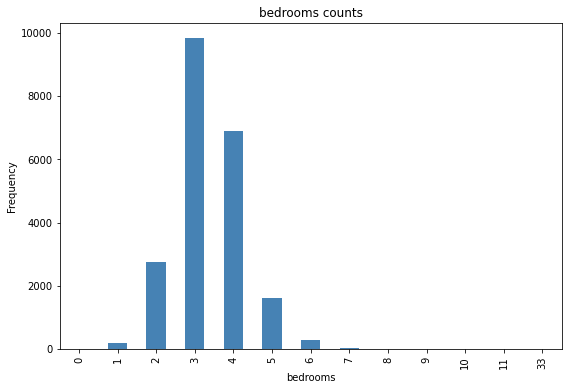

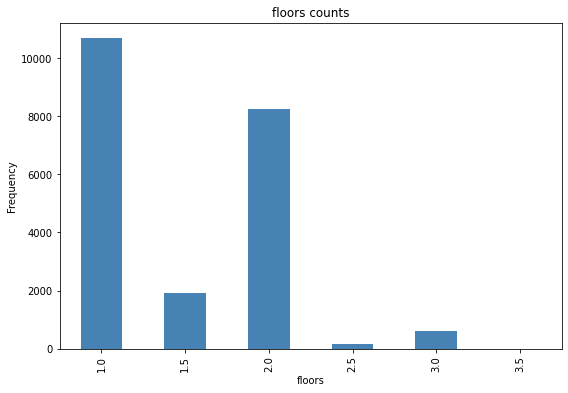

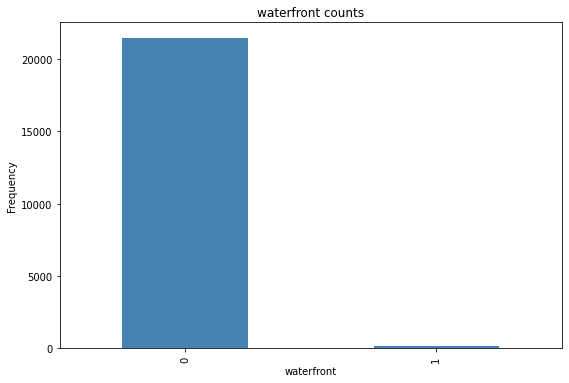

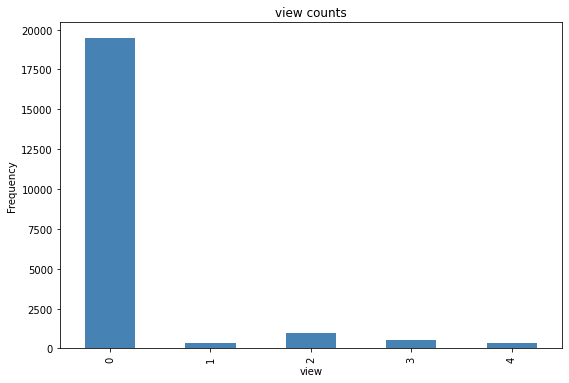

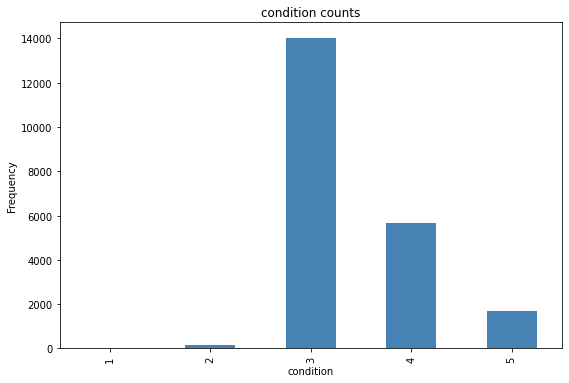

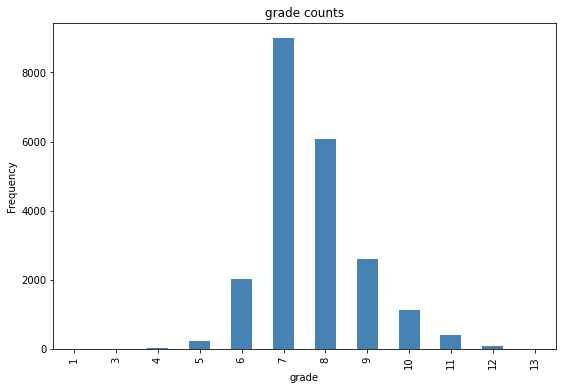

In [11]:
# Bar plot for categorical features
bar_plot(df, cat_col)

Histogram for numeric_columns


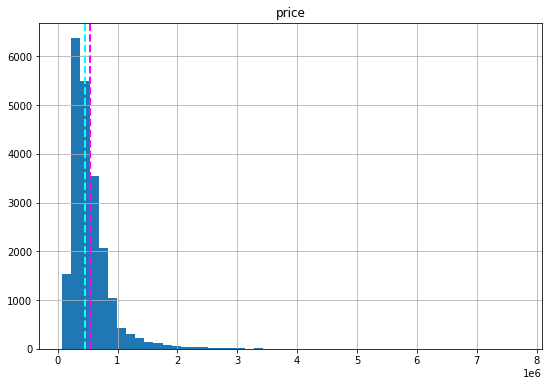

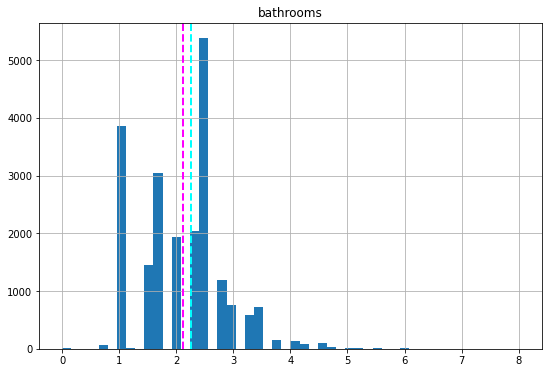

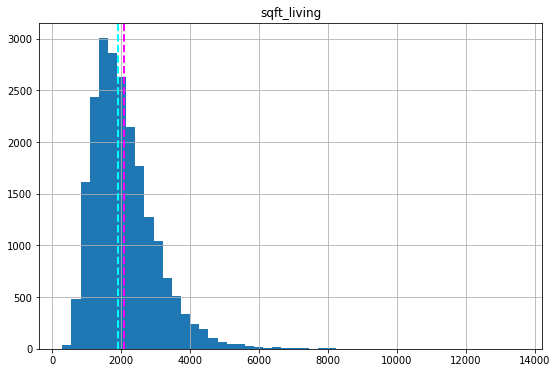

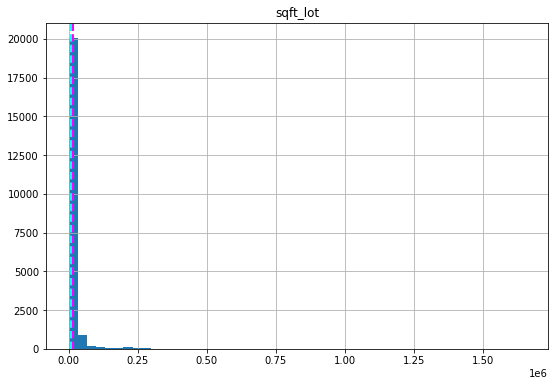

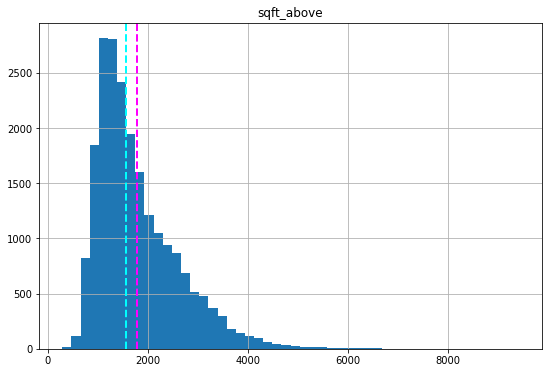

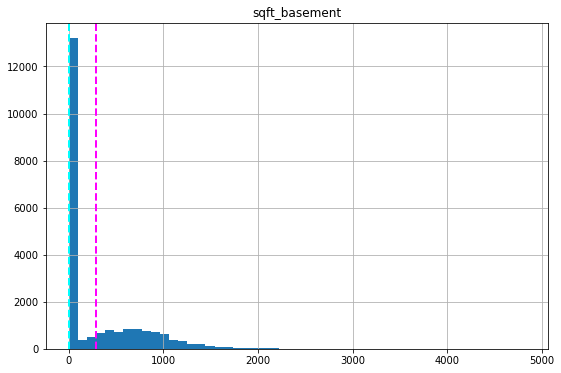

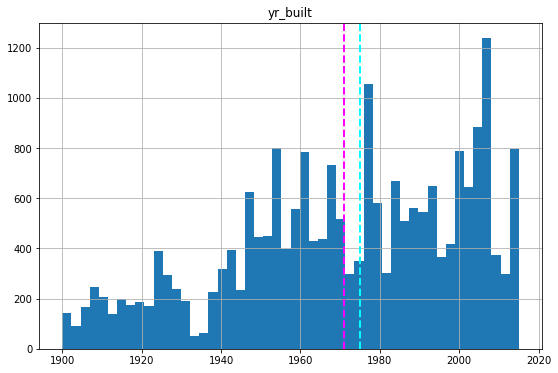

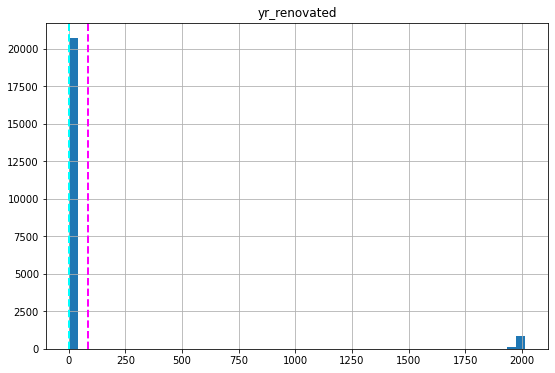

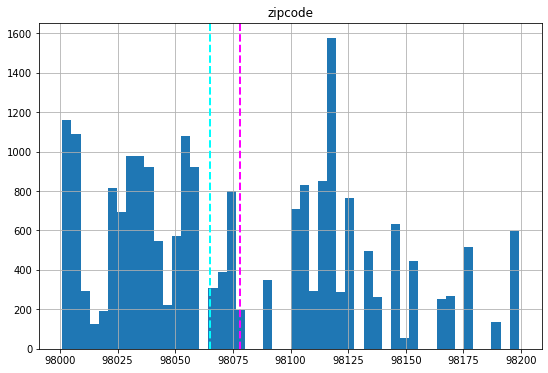

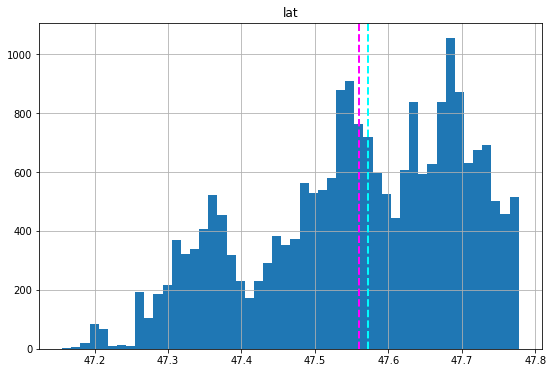

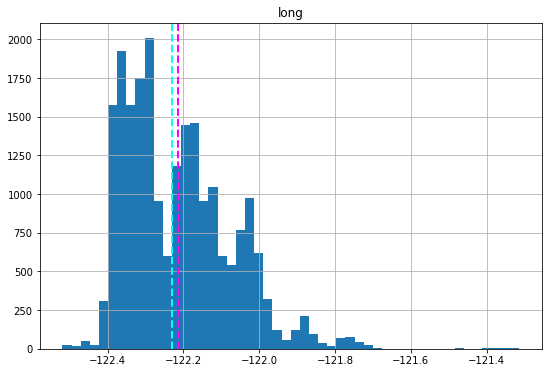

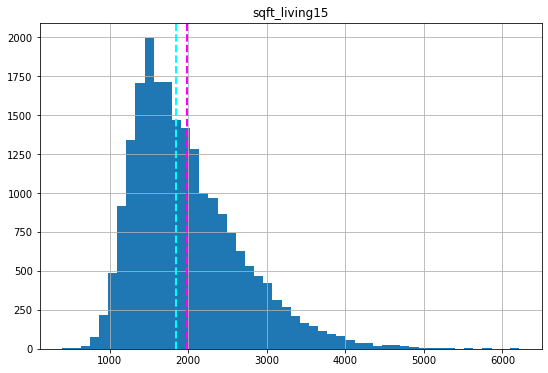

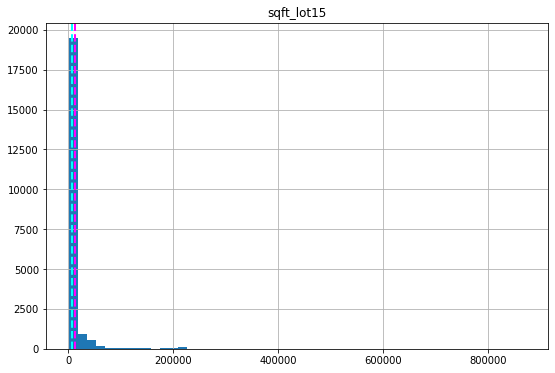

In [12]:
# Histogram for numerical columns
histogram_plot(df, num_col)

Scater plot


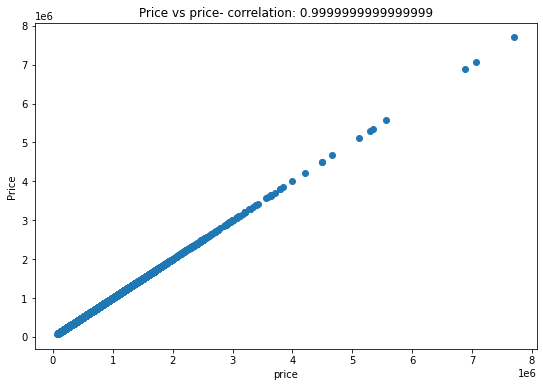

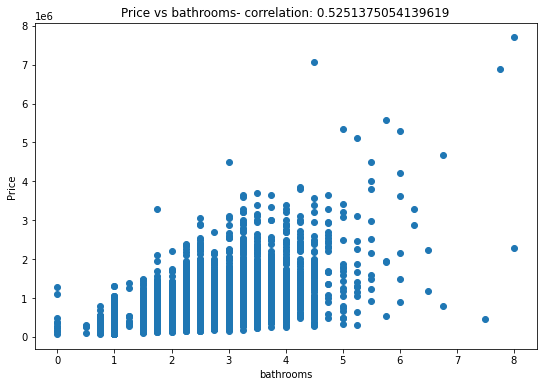

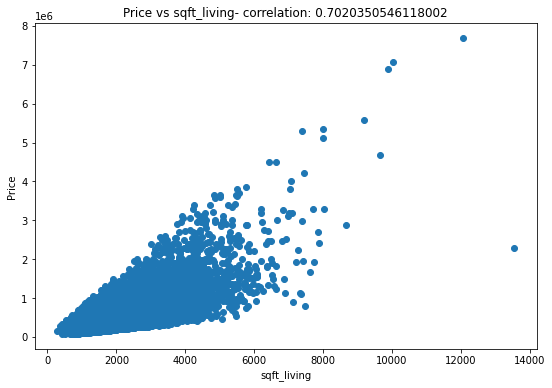

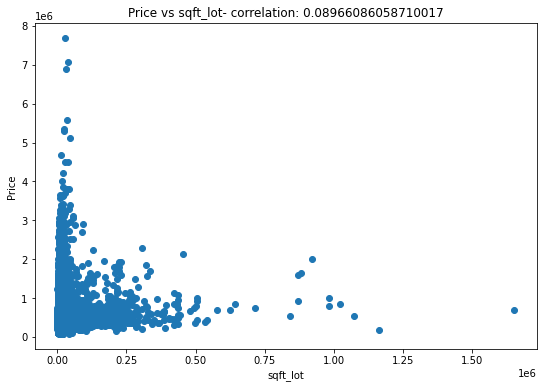

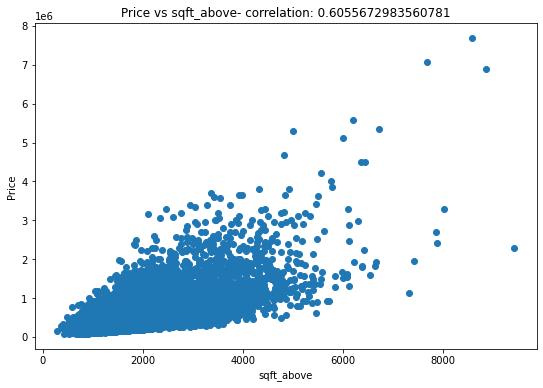

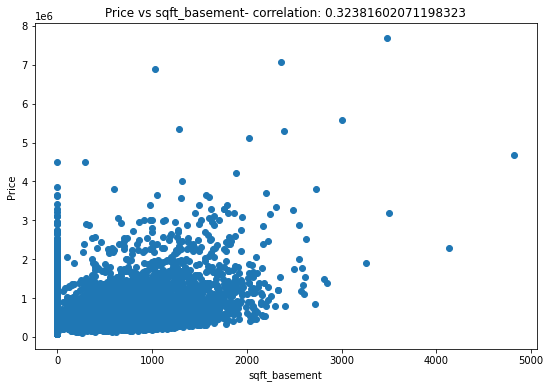

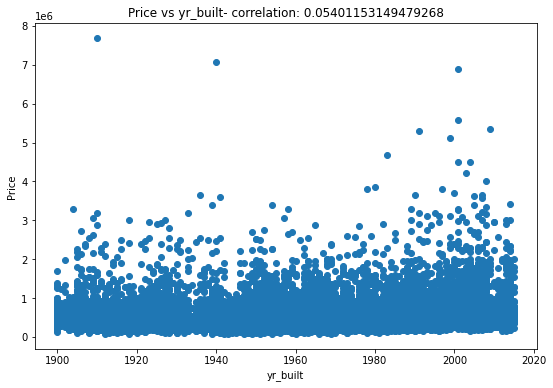

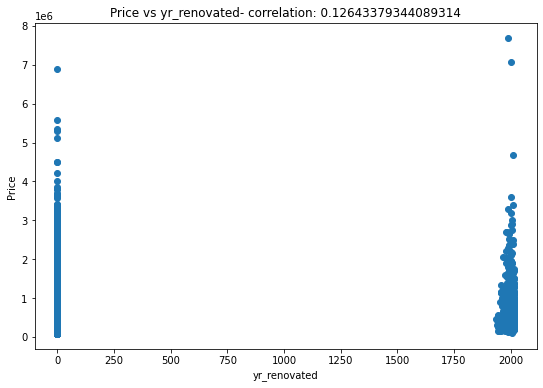

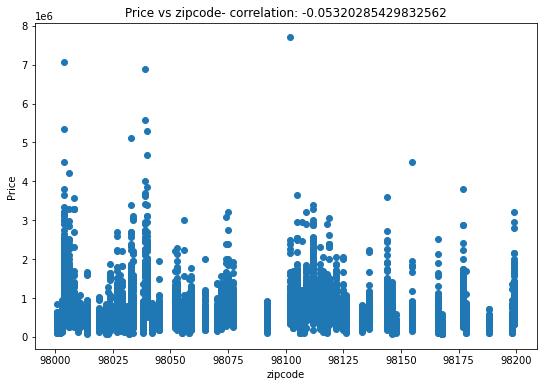

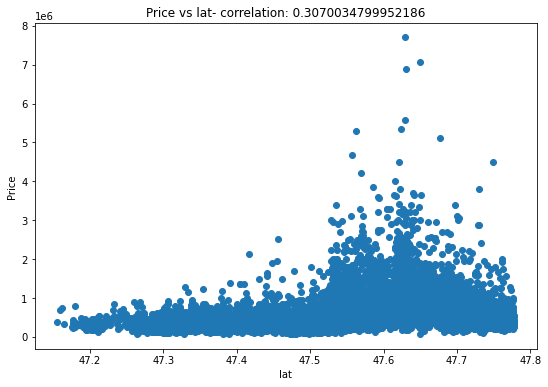

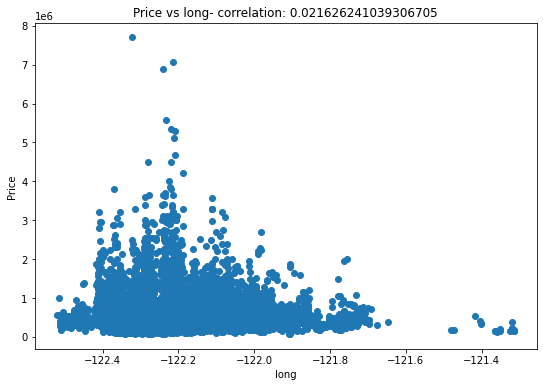

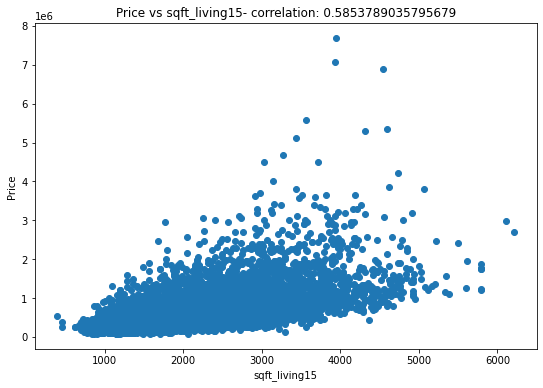

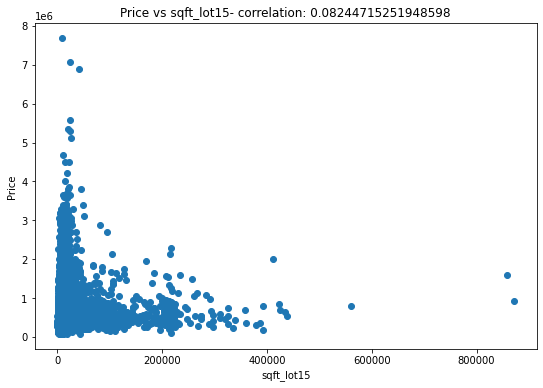

In [13]:
# Scatter plot for price vs numerical columns
scater_plot(df, num_col, 'price')

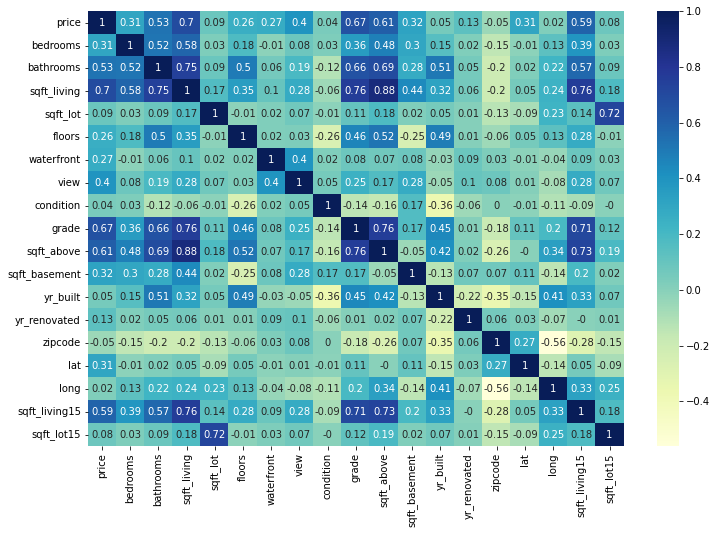

In [14]:
# Correlation plot
corr = df.corr().round(2)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="YlGnBu");

## 3. Split dataset

In [15]:
# create function for Split data

def split_data(data, target_col):
  
  # Remove rows with missing target, seprate target from predictors
  data_copy = data.copy()
  data_copy.dropna(axis=0, subset=[target_col], inplace=True)
  y = data_copy[target_col]
  data_copy.drop([target_col], axis=1, inplace=True)

  # Break off validation set from training data
  from sklearn.model_selection import train_test_split
  X_train, X_valid, y_train, y_valid = train_test_split(data_copy, y, train_size=0.8, test_size=0.2, random_state=4)

  return X_train, X_valid, y_train, y_valid

In [16]:
# Split data from main dataset to train, test and target
X_train, X_valid, y_train, y_valid = split_data(df, 'price')

## 4. Model train

Create column classification function for pipeline

In [17]:
def col_classification(data, num=20):
  # Select categorical columns
  cat_cols = [cname for cname in data.columns if
                    data[cname].nunique() < num and
                    data[cname].dtype =='object']

  # Select numerical columns
  num_cols = [cname for cname in data.columns if
                  data[cname].dtype in ['int64', 'float64']]

  return cat_cols, num_cols


In [18]:
# Categorical cols and numerical columns classfication
categorical_cols, numerical_cols = col_classification(X_train, 15)

Create model evaluation function

In [19]:
def evaluation_model(X_test, y_test, title="Target price prediction"):
  """Evaluation Model for regression problem, We need to use model name is clf"""
  # Evaluate the model using the test data
  preds = reg.predict(X_test)

  mse = mean_squared_error(y_test, preds)
  print("MSE:", mse)
  rmse = np.sqrt(mse)
  print('Mae: ', mean_absolute_error(y_valid, preds))
  print("RMSE:", rmse)
  r2 = r2_score(y_valid, preds)
  print("R2:", r2)

  # Plot predicted vs actual
  plt.scatter(y_test, preds)
  plt.xlabel('Actual Labels')
  plt.ylabel('Predicted Labels')
  plt.title(title)

  # overlay the regression line
  z = np.polyfit(y_test, preds, 1)
  p = np.poly1d(z)
  plt.plot(y_valid,p(y_valid), color='magenta')
  return plt.show() 

Try some of the linear regression model and evaluation their performance in our dataset

####################################################################### 

Linear Regression:
MSE: 39200213360.80082
Mae:  126368.12273608406
RMSE: 197990.43754888978
R2: 0.6969193739897344


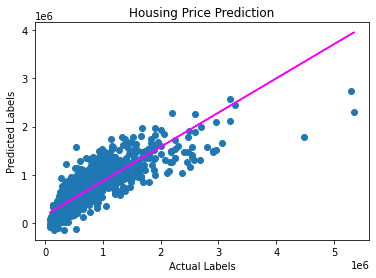

####################################################################### 

Decision Tree Regressior:
MSE: 34417352737.09258
Mae:  102160.56407587323
RMSE: 185519.14385607914
R2: 0.7338985704704069


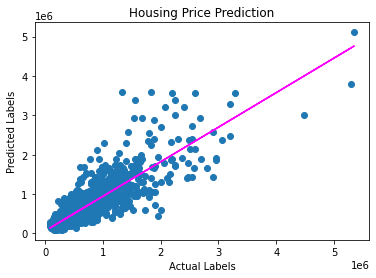

####################################################################### 

Random Forrest Regressor:
MSE: 18162286380.11735
Mae:  74226.73579893813
RMSE: 134767.52717222853
R2: 0.8595763478326324


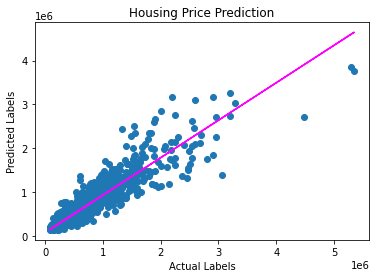

####################################################################### 

Ridge:
MSE: 39198310267.71639
Mae:  126345.73802744283
RMSE: 197985.6314678325
R2: 0.696934087956673


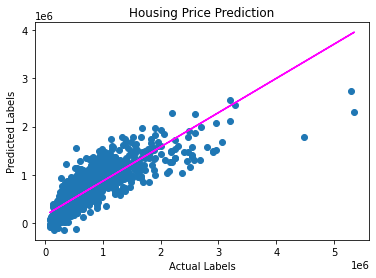

####################################################################### 

Lasso:
MSE: 39200159110.19564
Mae:  126367.02043907823
RMSE: 197990.30054574806
R2: 0.6969197934340681


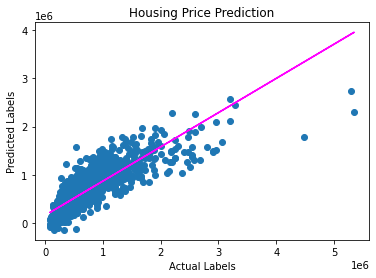

####################################################################### 

ElasticN:
MSE: 49064001291.28578
Mae:  144483.2620113785
RMSE: 221503.95321818927
R2: 0.6206564467120647


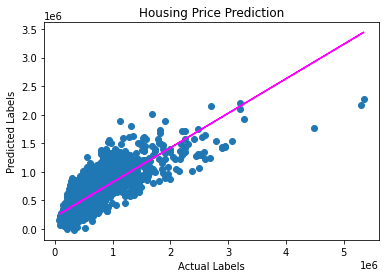

####################################################################### 

Gradient Boosting Regressor:
MSE: 17043089793.809875
Mae:  77737.30667118427
RMSE: 130549.18534334052
R2: 0.8682295354794584


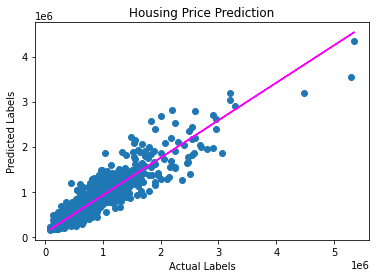

####################################################################### 



In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


models={'Linear Regression': LinearRegression(),
        'Decision Tree Regressior' : DecisionTreeRegressor(random_state=0),
        'Random Forrest Regressor' : RandomForestRegressor(n_estimators=10, random_state=0),
       'Ridge': Ridge(),
       'Lasso': Lasso(),
       'ElasticN': ElasticNet(),
       'Gradient Boosting Regressor': GradientBoostingRegressor()
        }

print('####################################################################### \n')
for name, model in models.items():
    name_model = model
    reg = name_model.fit(X_train, y_train)
    print(f'{name}:')
    evaluation_model(X_valid, y_valid, 'Housing Price Prediction')
    print('####################################################################### \n')

After the evaluation Gradient Boosting Regressor works well in our dataset so we will use it.

**Model train with Gradient Boosting Regressor using sklearn pipeline**

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor


# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
     ])


model = GradientBoostingRegressor(random_state=4, n_estimators=1600)

# Bundle Preprocessing and modeling code in pipeline
reg = Pipeline(steps=[
                    ('preprocessor', preprocessor),
                    ('scaler', StandardScaler()),
                    ('model', model),
                     ])

# Preprocessing of training data, fit model
reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'waterfront',
                                                   'view', 'condition', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'zipcode',
                                                   'lat', 'long',
                                                   'sqft_living15',
                                                   'sqft_lot15']),
                                                 ('cat',
                                   

MSE: 13811738810.108906
Mae:  66634.5069623637
RMSE: 117523.35431780743
R2: 0.8932130698797662


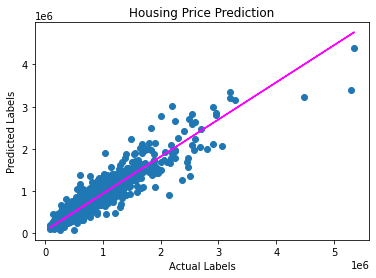

In [22]:
evaluation_model(X_valid, y_valid, 'Housing Price Prediction')

## 5. Save Model, Load and Prediction

In [23]:
import pickle
!mkdir 'model_save'
pickle.dump(reg, open("model_save/model.pkl","wb"))

mkdir: cannot create directory ‘model_save’: File exists


In [24]:
# Load the model from the file
loaded_model = pickle.load(open('model_save/model.pkl', 'rb'))

In [25]:
X_new = pd.read_csv('dataset/user_input.csv')
X_new

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,5,3.5,3450,19080,2.0,0,3,3,9,3450,0,2001,0,98022,47.2123,-122.005,2570,17007


In [26]:
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} price'.format(np.round(result[0])))

Prediction: 562858 price
